#### **1) Import Libraries**

In [1]:
# Read Data
import numpy as np                     # Linear Algebra (calculate the mean and standard deviation)
import pandas as pd                    # manipulate data, data processing, load csv file I/O (e.g. pd.read_csv)

# Visualization
import seaborn as sns                  # Visualization using seaborn
import matplotlib.pyplot as plt        # Visualization using matplotlib
%matplotlib inline

# style
plt.style.use("fivethirtyeight")       # Set Graphs Background style using matplotlib
sns.set_style("darkgrid")              # Set Graphs Background style using seaborn

import warnings                        # Ignore Warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBRegressor, plot_importance
from lightgbm import LGBMRegressor, plot_importance

#### **2) Import Data And Preprocessing**

In [3]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
bike = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML Project/Seoul_Bike_Trip_Duration/For_modeling.csv')

In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9601139 entries, 0 to 9601138
Data columns (total 26 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   Duration    int64  
 2   Distance    int64  
 3   PLong       float64
 4   PLatd       float64
 5   DLong       float64
 6   DLatd       float64
 7   Haversine   float64
 8   Pmonth      int64  
 9   Pday        int64  
 10  Phour       int64  
 11  Pmin        int64  
 12  PDweek      int64  
 13  Dmonth      int64  
 14  Dday        int64  
 15  Dhour       int64  
 16  Dmin        int64  
 17  DDweek      int64  
 18  Temp        float64
 19  Precip      float64
 20  Wind        float64
 21  Humid       float64
 22  Solar       float64
 23  Snow        float64
 24  GroundTemp  float64
 25  Dust        float64
dtypes: float64(13), int64(13)
memory usage: 1.9 GB


In [6]:
bike.head(5)

,Unnamed: 0,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,0,3,50,37.544666,126.888359,37.544666,126.888359,0.000000,1,1,0,0,0,1,1,0,4,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
1,1,24,7670,37.506199,127.003944,37.551250,127.035103,5.713529,1,1,0,0,0,1,1,0,25,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
2,2,8,1390,37.544590,127.057083,37.537014,127.061096,0.913702,1,1,0,0,0,1,1,0,9,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
3,3,8,1820,37.571102,127.023560,37.561447,127.034920,1.468027,1,1,0,1,0,1,1,0,10,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
4,4,4,850,37.573242,127.015907,37.565849,127.016403,0.823227,1,1,0,1,0,1,1,0,6,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0


In [7]:
bike.tail(5)

,Unnamed: 0,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
9601134,9830306,67,6930,37.562607,127.051308,37.562607,127.051308,0.000000,12,31,23,43,0,1,1,0,51,1,-5.2,0.0,1.6,47.0,0.0,0.0,-5.1,53.0
9601135,9830307,58,8320,37.511982,127.085052,37.476028,127.105942,4.402263,12,31,23,54,0,1,1,0,53,1,-5.2,0.0,1.6,47.0,0.0,0.0,-5.1,53.0
9601136,9830308,118,2730,37.506199,127.003944,37.514870,127.015282,1.389156,12,31,22,59,0,1,1,0,58,1,-5.4,0.0,1.3,46.0,0.0,0.0,-5.0,49.0
9601137,9830309,90,17170,37.489750,126.927467,37.565903,126.901184,8.779307,12,31,23,55,0,1,1,1,26,1,-5.2,0.0,1.6,47.0,0.0,0.0,-5.1,53.0
9601138,9830310,116,1410,37.585655,127.075050,37.585655,127.075050,0.000000,12,31,23,33,0,1,1,1,30,1,-5.2,0.0,1.6,47.0,0.0,0.0,-5.1,53.0


In [8]:
bike.describe

<bound method NDFrame.describe of          Unnamed: 0  Duration  Distance  ...  Snow  GroundTemp  Dust
0                 0         3        50  ...   0.0        -2.2  25.0
1                 1        24      7670  ...   0.0        -2.2  25.0
2                 2         8      1390  ...   0.0        -2.2  25.0
3                 3         8      1820  ...   0.0        -2.2  25.0
4                 4         4       850  ...   0.0        -2.2  25.0
...             ...       ...       ...  ...   ...         ...   ...
9601134     9830306        67      6930  ...   0.0        -5.1  53.0
9601135     9830307        58      8320  ...   0.0        -5.1  53.0
9601136     9830308       118      2730  ...   0.0        -5.0  49.0
9601137     9830309        90     17170  ...   0.0        -5.1  53.0
9601138     9830310       116      1410  ...   0.0        -5.1  53.0

[9601139 rows x 26 columns]>

In [9]:
bike.shape

(9601139, 26)

In [10]:
bike.columns

Index(['Unnamed: 0', 'Duration', 'Distance', 'PLong', 'PLatd', 'DLong',
       'DLatd', 'Haversine', 'Pmonth', 'Pday', 'Phour', 'Pmin', 'PDweek',
       'Dmonth', 'Dday', 'Dhour', 'Dmin', 'DDweek', 'Temp', 'Precip', 'Wind',
       'Humid', 'Solar', 'Snow', 'GroundTemp', 'Dust'],
      dtype='object')

In [11]:
bike.dtypes

Unnamed: 0      int64
Duration        int64
Distance        int64
PLong         float64
PLatd         float64
DLong         float64
DLatd         float64
Haversine     float64
Pmonth          int64
Pday            int64
Phour           int64
Pmin            int64
PDweek          int64
Dmonth          int64
Dday            int64
Dhour           int64
Dmin            int64
DDweek          int64
Temp          float64
Precip        float64
Wind          float64
Humid         float64
Solar         float64
Snow          float64
GroundTemp    float64
Dust          float64
dtype: object

In [12]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9601139 entries, 0 to 9601138
Data columns (total 26 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   Duration    int64  
 2   Distance    int64  
 3   PLong       float64
 4   PLatd       float64
 5   DLong       float64
 6   DLatd       float64
 7   Haversine   float64
 8   Pmonth      int64  
 9   Pday        int64  
 10  Phour       int64  
 11  Pmin        int64  
 12  PDweek      int64  
 13  Dmonth      int64  
 14  Dday        int64  
 15  Dhour       int64  
 16  Dmin        int64  
 17  DDweek      int64  
 18  Temp        float64
 19  Precip      float64
 20  Wind        float64
 21  Humid       float64
 22  Solar       float64
 23  Snow        float64
 24  GroundTemp  float64
 25  Dust        float64
dtypes: float64(13), int64(13)
memory usage: 1.9 GB


In [13]:
bike.count()

Unnamed: 0    9601139
Duration      9601139
Distance      9601139
PLong         9601139
PLatd         9601139
DLong         9601139
DLatd         9601139
Haversine     9601139
Pmonth        9601139
Pday          9601139
Phour         9601139
Pmin          9601139
PDweek        9601139
Dmonth        9601139
Dday          9601139
Dhour         9601139
Dmin          9601139
DDweek        9601139
Temp          9601139
Precip        9601139
Wind          9601139
Humid         9601139
Solar         9601139
Snow          9601139
GroundTemp    9601139
Dust          9601139
dtype: int64

#Exploratory Data Analysis

In [14]:
bike.drop('Unnamed: 0', axis=1, inplace=True)

In [15]:
bike_org = bike.copy()

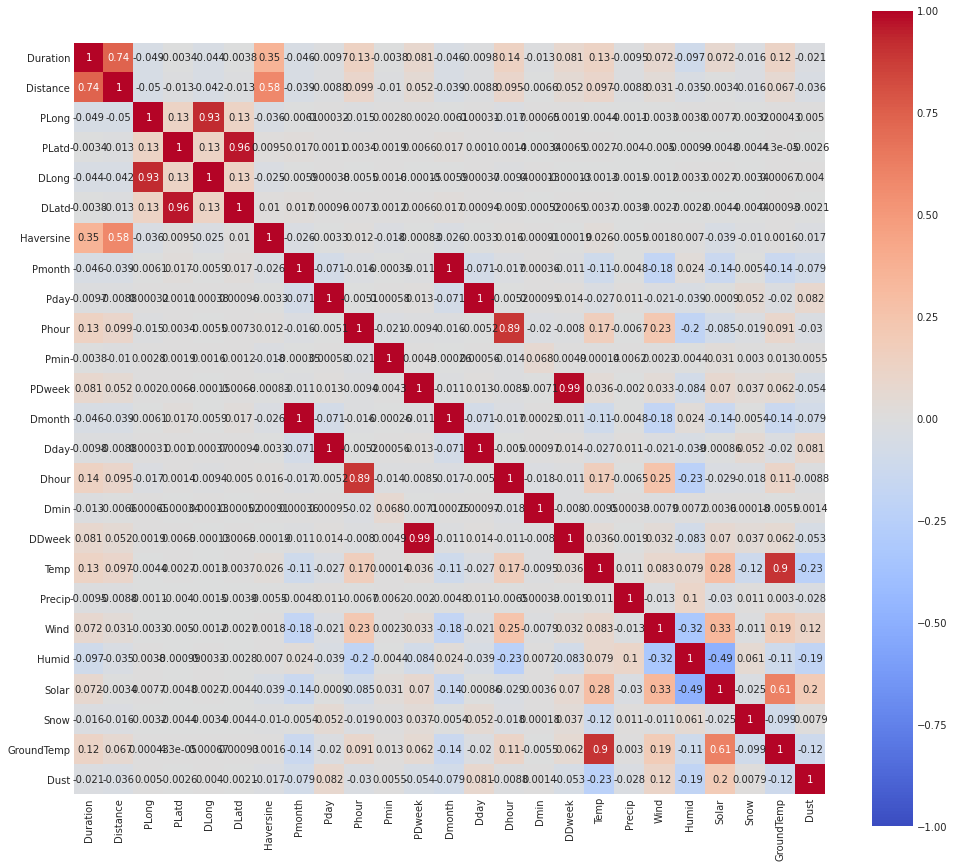

In [28]:
plt.figure(figsize=(15,15))
sns.heatmap(bike.corr(method='pearson'),
             vmin=-1, vmax=1,
            cmap='coolwarm',
            annot=True, 
            square=True);

- After creating the final dataset, the next step is to check whether the considered variables used for predicting the trip duration is correlated with the dependent variable. 
- So a correlation plot is created for finding the relationship among the variables. 
- Fig. shows the pairs plot and displays the correlation values of Trip duration with Distance, PLong, PLatd, DLong, DLatd, Haversine, Temp, Precip, Wind, Humid, Snow, GroundTemp and Dust. 
- As can be seen from the plot that the dependent variable Duration has at least least correlation value with the independent variables. This shows the trip duration variable is associated with other variables considered in this study. 
- Positive values represent a positive correlation between the variables and negative value represents a negative correlation between the variables. 
- The highest correlation value exists between Duration and Distance variables.

In [17]:
# FEATURE IMPORTANCE CORRELATION
# determine 20 most correlated features

bike_corr = bike.corr()['Duration'].sort_values(ascending=False).head(25)
top_corr_features = bike_corr.index
top_corr_features

Index(['Duration', 'Distance', 'Haversine', 'Dhour', 'Phour', 'Temp',
       'GroundTemp', 'DDweek', 'PDweek', 'Wind', 'Solar', 'PLatd', 'DLatd',
       'Pmin', 'Precip', 'Pday', 'Dday', 'Dmin', 'Snow', 'Dust', 'DLong',
       'Dmonth', 'Pmonth', 'PLong', 'Humid'],
      dtype='object')

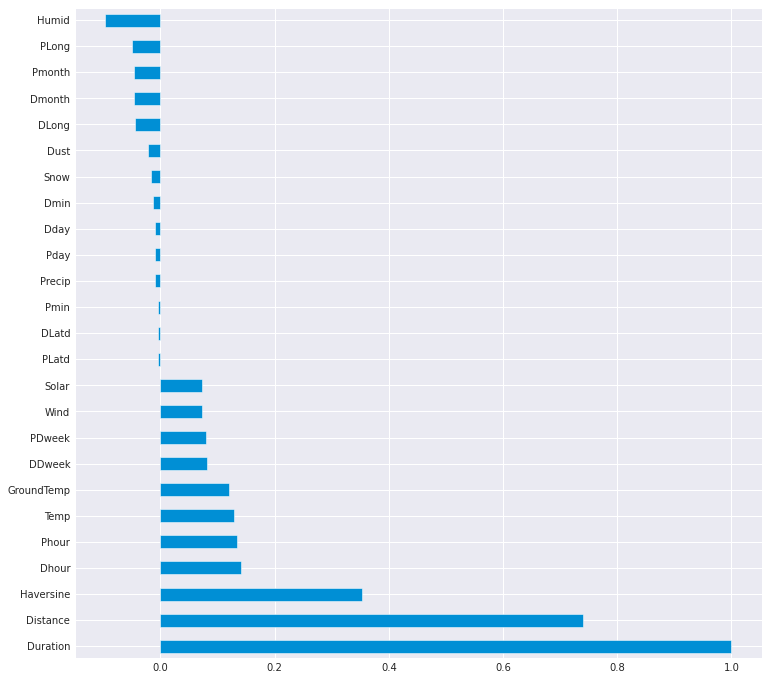

In [18]:
# plot top 20 most correlated features to our target (Class)
plt.figure(figsize=(11,12))
bike_corr.plot(kind='barh')
plt.show()

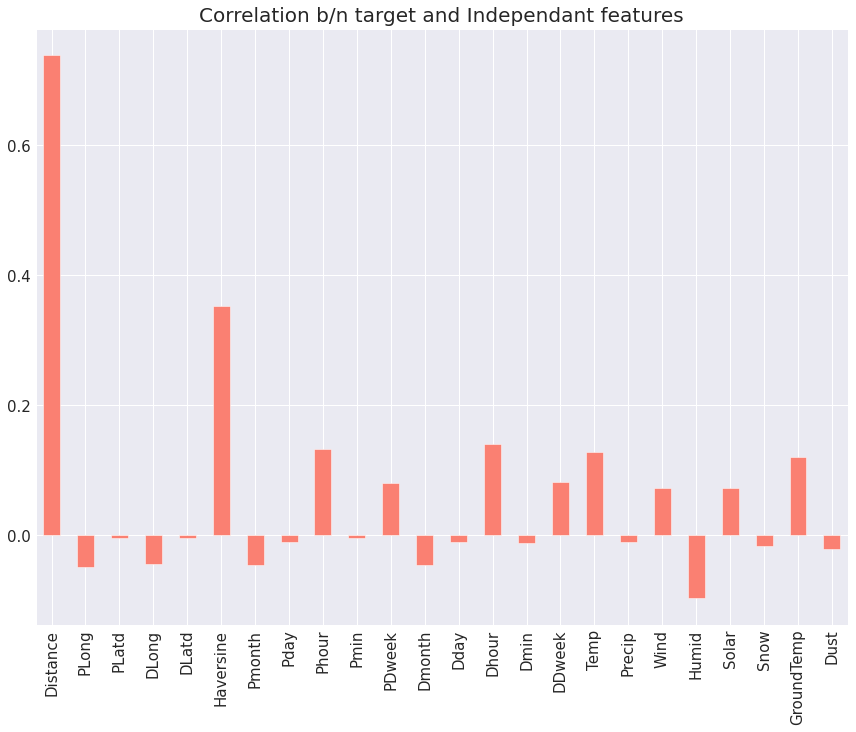

In [19]:
a = bike.drop(['Duration'], axis=1)
a.corrwith(bike['Duration']).plot(kind='bar', figsize=(13,11), color=['salmon'])
plt.title('Correlation b/n target and Independant features', size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [20]:
bike['Duration'].value_counts()

5      434870
6      431674
4      415106
7      410592
8      389080
        ...  
115     10900
116     10352
117      9851
118      8817
119      7685
Name: Duration, Length: 119, dtype: int64

#Outliers
- remove outliers in Trip duration and Trip distance field

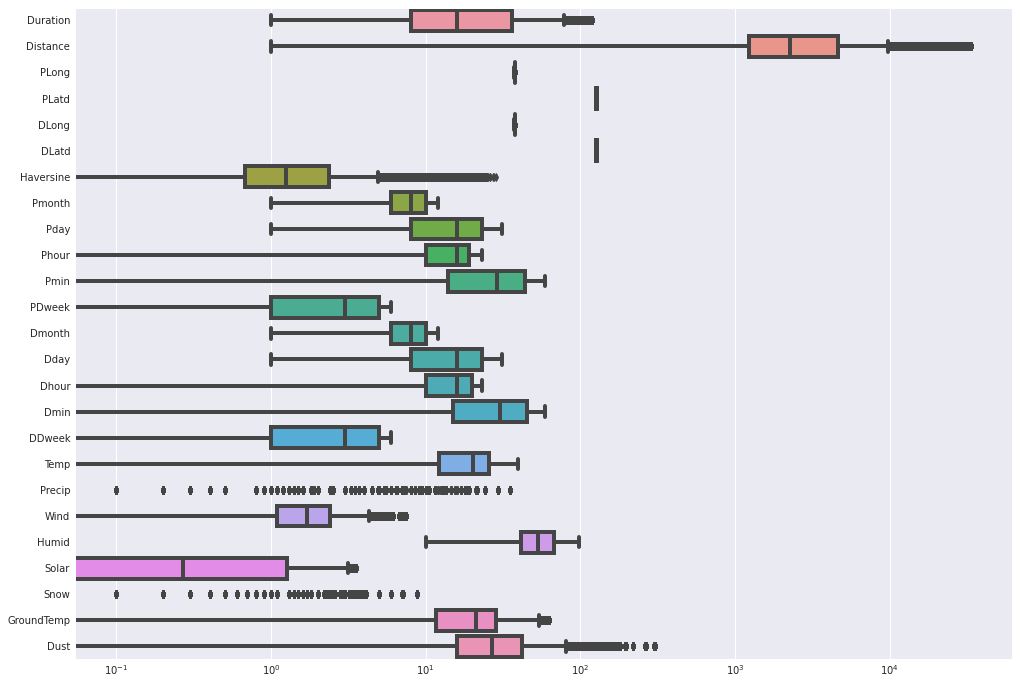

In [21]:
plt.figure(figsize=(15,12))
sns.boxplot(data=bike, orient='h');
plt.xscale('log')

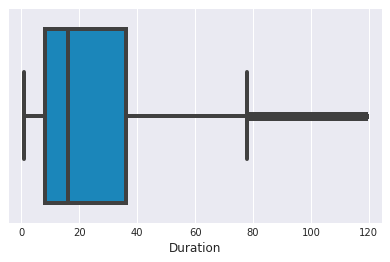

In [22]:
sns.boxplot(data=bike, x='Duration');

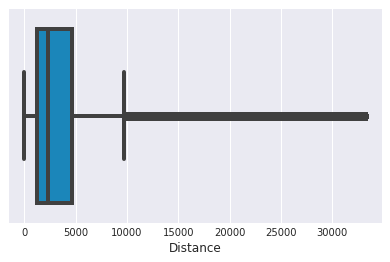

In [23]:
sns.boxplot(data=bike, x='Distance');

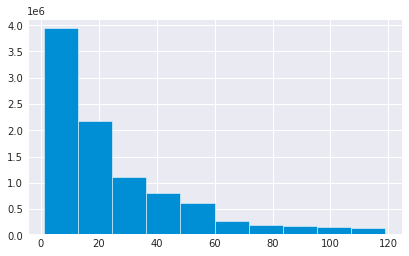

In [24]:
plt.hist(bike['Duration']);

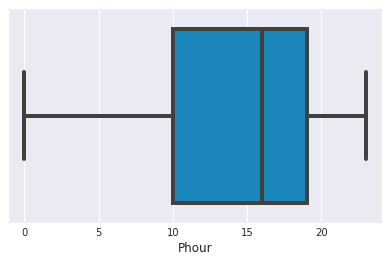

In [25]:
sns.boxplot(data=bike, x='Phour');

Number of unique values in  Duration:

 5      434870
6      431674
4      415106
7      410592
8      389080
        ...  
115     10900
116     10352
117      9851
118      8817
119      7685
Name: Duration, Length: 119, dtype: int64


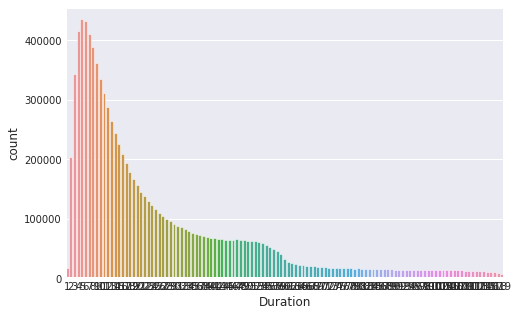

In [26]:
print("Number of unique values in  Duration:\n\n", bike['Duration'].value_counts())
plt.figure(figsize=(7,5))
sns.countplot(data=bike, x='Duration')
plt.show()